In [1]:
#THIS NOTEBOOK GENERATES ALL FIGURES IN CATALÁN ET AL. (2020)

In [12]:
from functions import *

(0, 500)

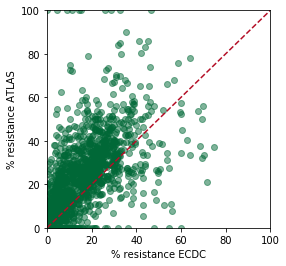

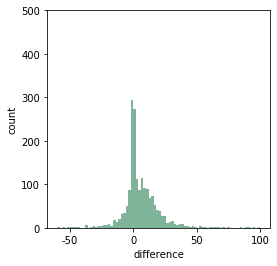

In [14]:
#FIGURE 1a
RD=pd.read_excel('data/atlas_vs_ecdc.xls')
x=RD['ECDCValue']
y=RD['ATLASValue']

#SCATTERPLOT
color1='#006837'
color2='#B40E26'
fig=plt.figure(figsize=(4,4))
ax=plt.gca()
ax.plot(x,y,'o', color=color1, alpha=0.5)
xodr=np.linspace(0,100,100)
ax.plot(xodr,xodr,'--', color=color2)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
ax.set_xlabel('% resistance ECDC')
ax.set_ylabel('% resistance ATLAS')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))    
#HISTOGRAM
D=RD['Diff']
bins=np.linspace(-100,100,101)
n, bins=np.histogram(D, bins=bins)
n1=[]
b1=[]
w=(bins[1]-bins[0])/2
for x,y in zip(bins,n):
    if y>0:
        n1.append(y)
        b1.append(x+w)
fig=plt.figure(figsize=(4,4))
ax=plt.gca()
ax.bar(b1,n1, width=2*w, facecolor=color1, alpha=0.5)
ax.set_xlabel('difference')
ax.set_ylabel('count')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))          
ax.set_ylim([0,500])

(0, 500)

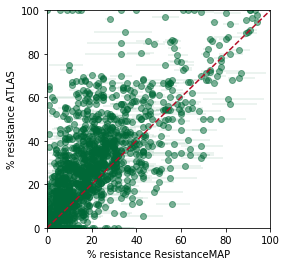

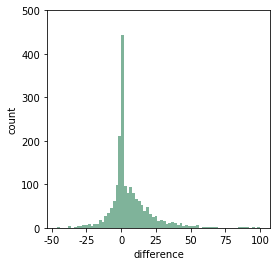

In [15]:
#FIGURE 1B
RD=pd.read_excel('data/atlas_vs_resistancemap.xls')
x=RD['RMapValue']
xH=RD['RMapCIHigh']-x
xL=x-RD['RMapCILow']
y=RD['ATLASValue']

#SCATTERPLOT
color1='#006837'
color2='#B40E26'
fig=plt.figure(figsize=(4,4))
ax=plt.gca()
ax.plot(x,y,'o', color=color1, alpha=0.5)
ax.errorbar(x,y,fmt='o', color=color1, markersize=0, xerr=[xH,xL], alpha=0.1)
xodr=np.linspace(0,100,100)
ax.plot(xodr,xodr,'--', color=color2)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
ax.set_xlabel('% resistance ResistanceMAP')
ax.set_ylabel('% resistance ATLAS')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))    
#HISTOGRAM
D=RD['Diff']
bins=np.linspace(-100,100,101)
n, bins=np.histogram(D, bins=bins)
n1=[]
b1=[]
w=(bins[1]-bins[0])/2
for x,y in zip(bins,n):
    if y>0:
        n1.append(y)
        b1.append(x+w)
fig=plt.figure(figsize=(4,4))
ax=plt.gca()
ax.bar(b1,n1, width=2*w, facecolor=color1, alpha=0.5)
ax.set_xlabel('difference')
ax.set_ylabel('count')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))          
ax.set_ylim([0,500])

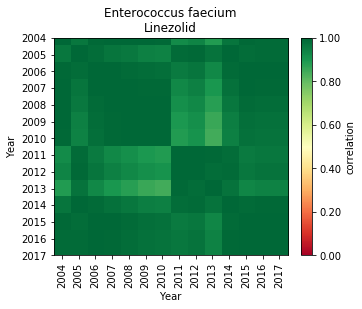

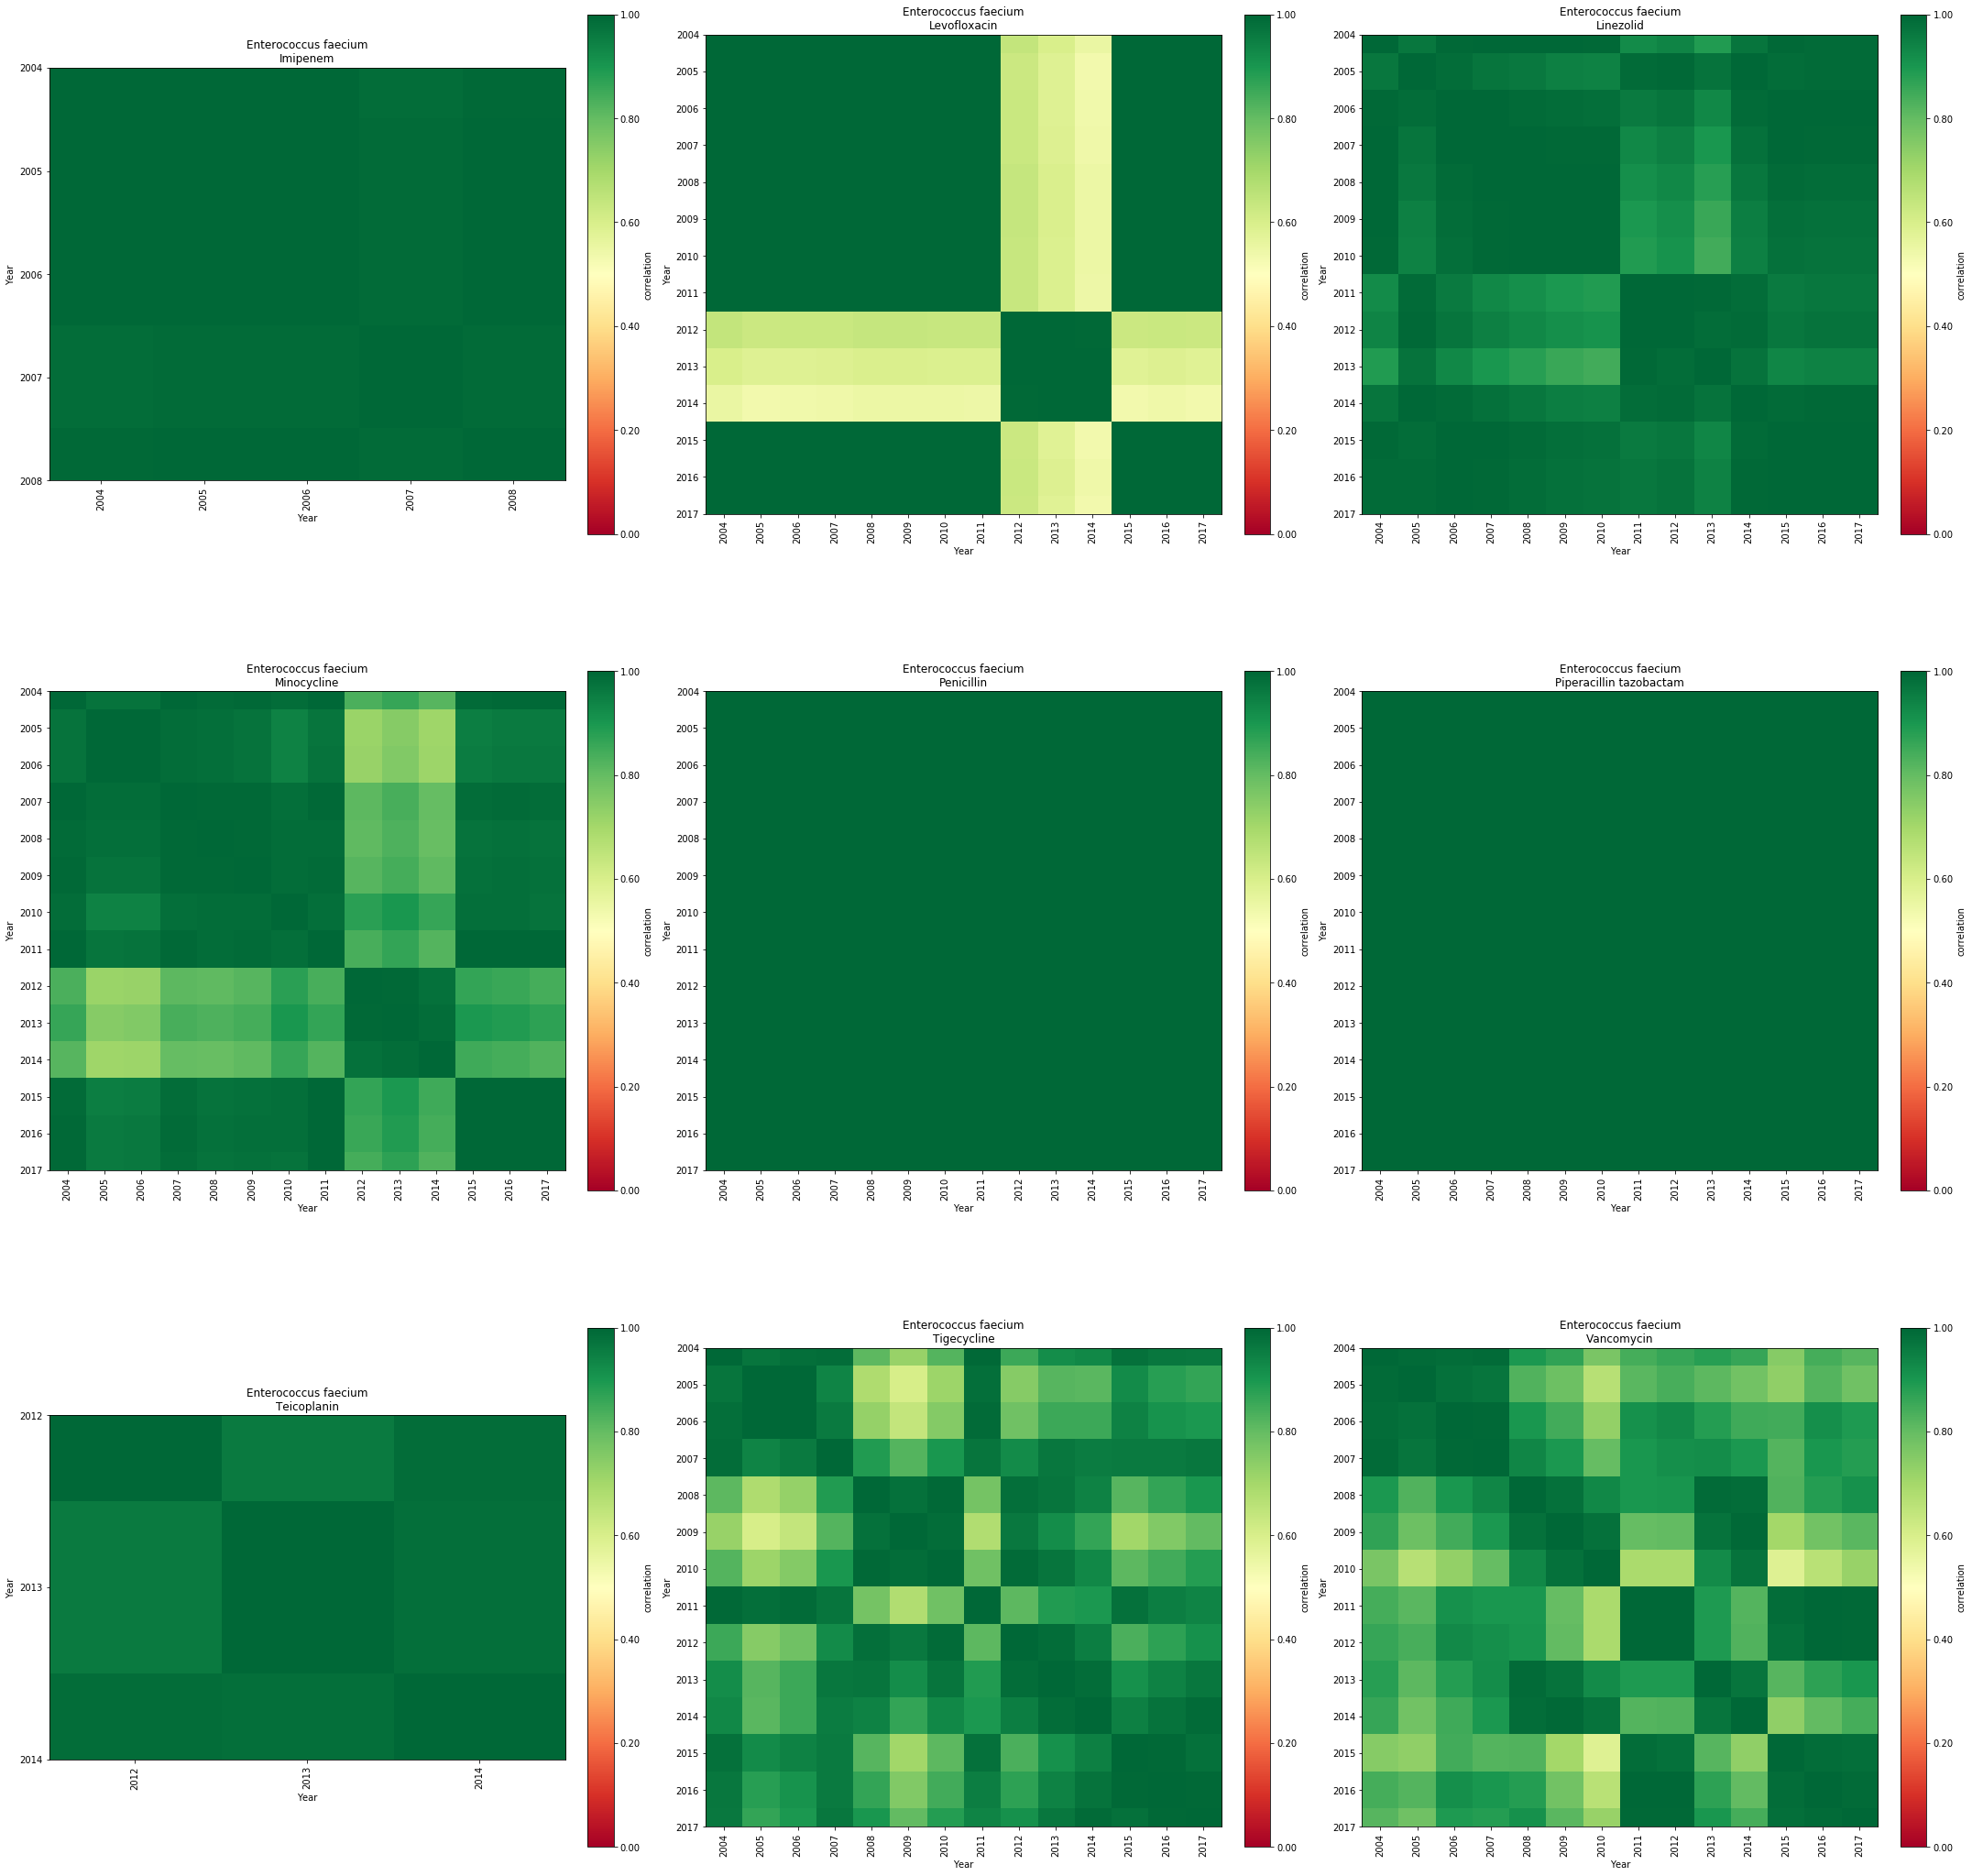

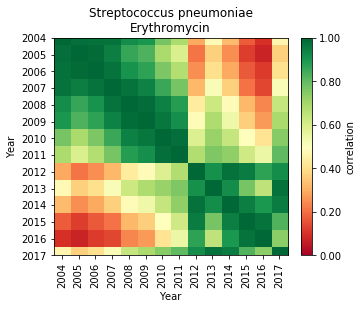

In [15]:
#FIGURE 1C and 1D

#FIG1C
sp='Enterococcus faecium'
c1='Linezolid'
R,Y=read_corr(sp,c1)
fig=plt.figure()
ax=plt.gca()
title=sp+'\n'+c1
I=corrplot(R,Y,ax,fig,title)

#FIG1C
fig=plt.figure(figsize=(30,30))
D=['Imipenem','Levofloxacin','Linezolid',
  'Minocycline','Penicillin','Piperacillin tazobactam',
  'Teicoplanin','Tigecycline','Vancomycin']
for i,c1 in enumerate(D):
    ax=fig.add_subplot(3,3,i+1)
    R,Y=read_corr(sp,c1)
    title=sp+'\n'+c1
    I=corrplot(R,Y,ax,fig,title)
fig.tight_layout()

#FIG 1D
sp='Streptococcus pneumoniae'
c1='Erythromycin'
R,Y=read_corr(sp,c1)
fig=plt.figure()
ax=plt.gca()
title=sp+'\n'+c1
I=corrplot(R,Y,ax,fig,title)

In [ ]:
#FIGURE 1C and D (waterfalls)

#FIRST i NEED TO GET MIC DISTRIBUTIONS DONE